#### EDA ON GOOGLE PLAY STORE DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('googledata.csv')

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [6]:
df[df.duplicated('App')].shape

(1181, 16)

### Insight and Observation
The dataset has duplicate records

In [7]:
df = df.drop_duplicates(subset=['App'],keep='first')

In [8]:
df.shape

(9659, 16)

### Exploring data

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print(' ')
print('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 8 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year']
 
We have 8 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [10]:
# Proportion of count data on categorical columns 
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-----------------------------------")

Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: App, Length: 9659, dtype: float64
-----------------------------------
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FINANCE    

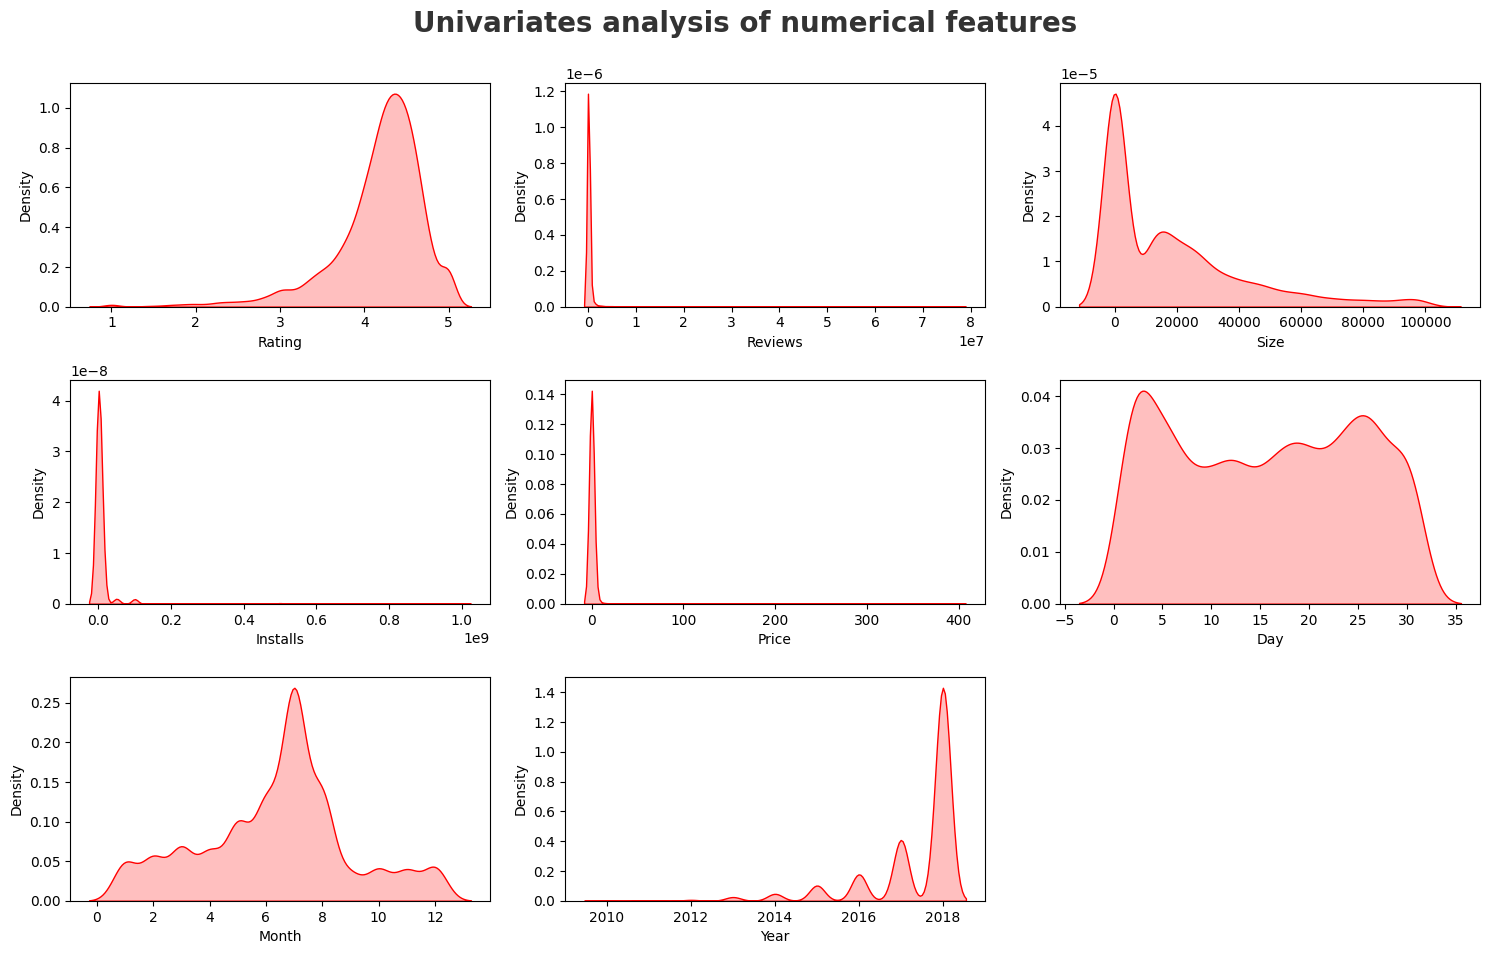

In [13]:
# Proportion of count data on Numerical columns 
plt.figure(figsize=(15,15))
plt.suptitle('Univariates analysis of numerical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True,color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

#### Observations
- Raring and year is left skewed while Reviews, Size, Install and Price are right skewed

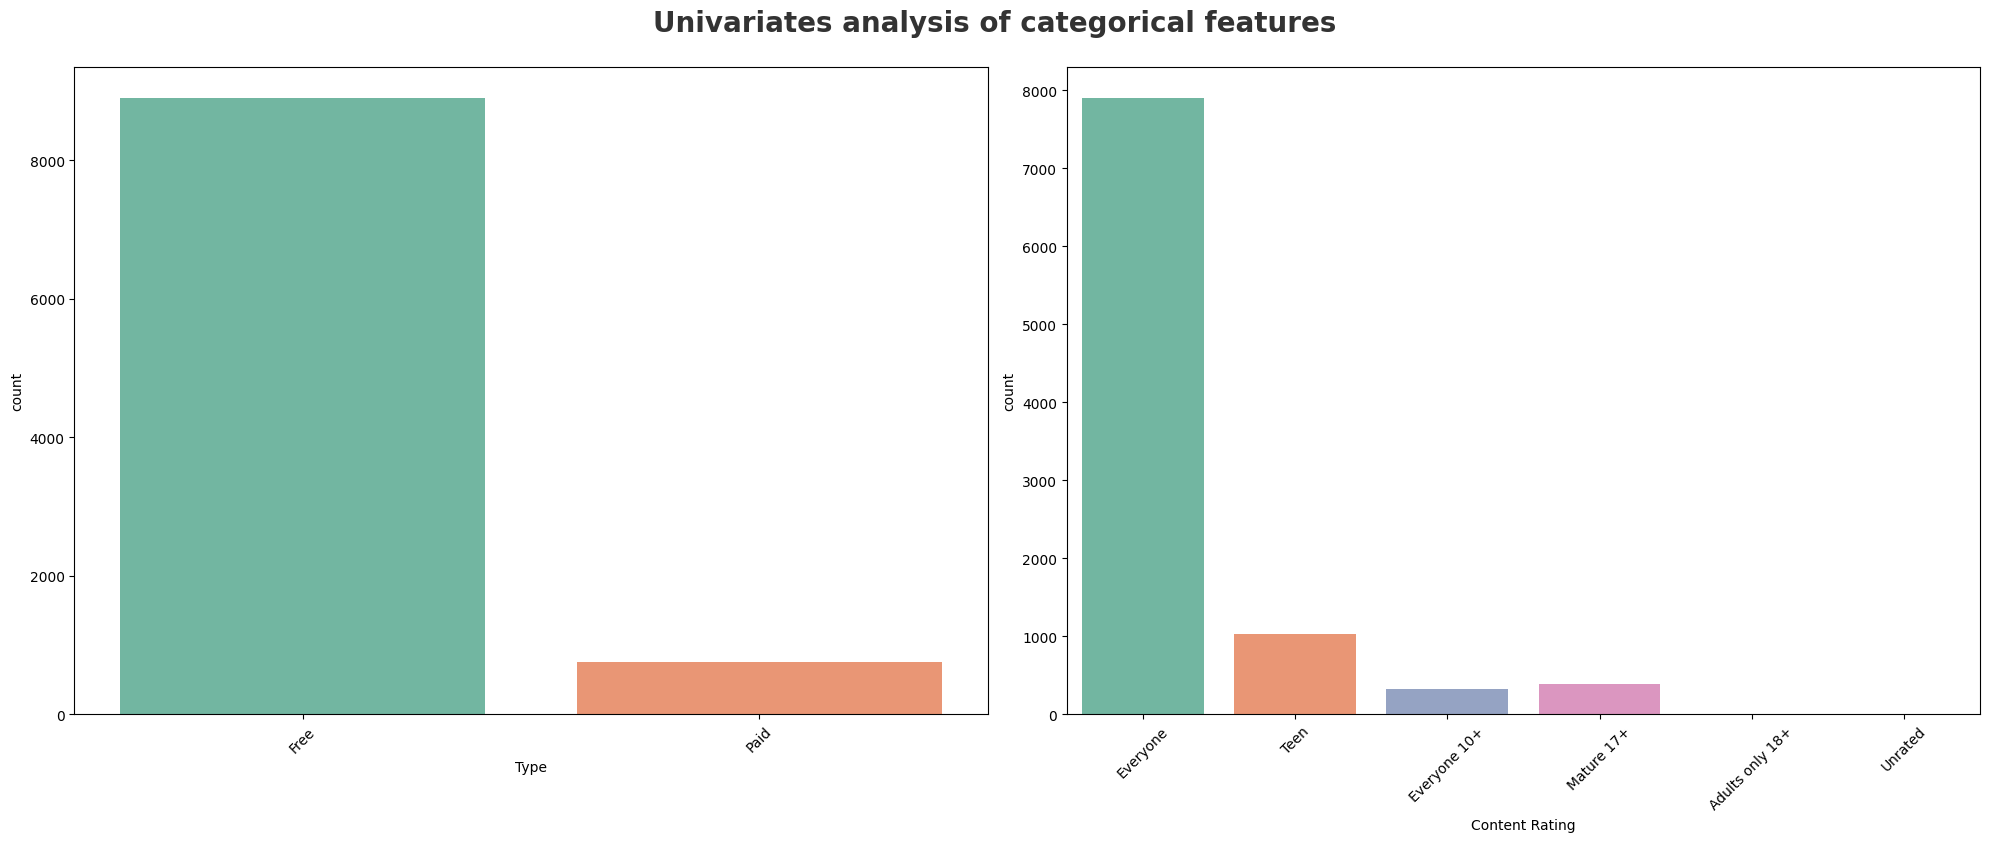

In [15]:
# Proportion of count data on categorical columns 
plt.figure(figsize=(20,15))
plt.suptitle('Univariates analysis of categorical features',fontsize=20,fontweight='bold',alpha=0.8,y=1.)
categories = ['Type','Content Rating']
for i in range(0, len(categories)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categories[i]],palette="Set2")
    plt.xlabel(categories[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Obersvation
- Free is huge than paid app

#### Which is the most popular app category ?

In [16]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


<AxesSubplot: ylabel='Category'>

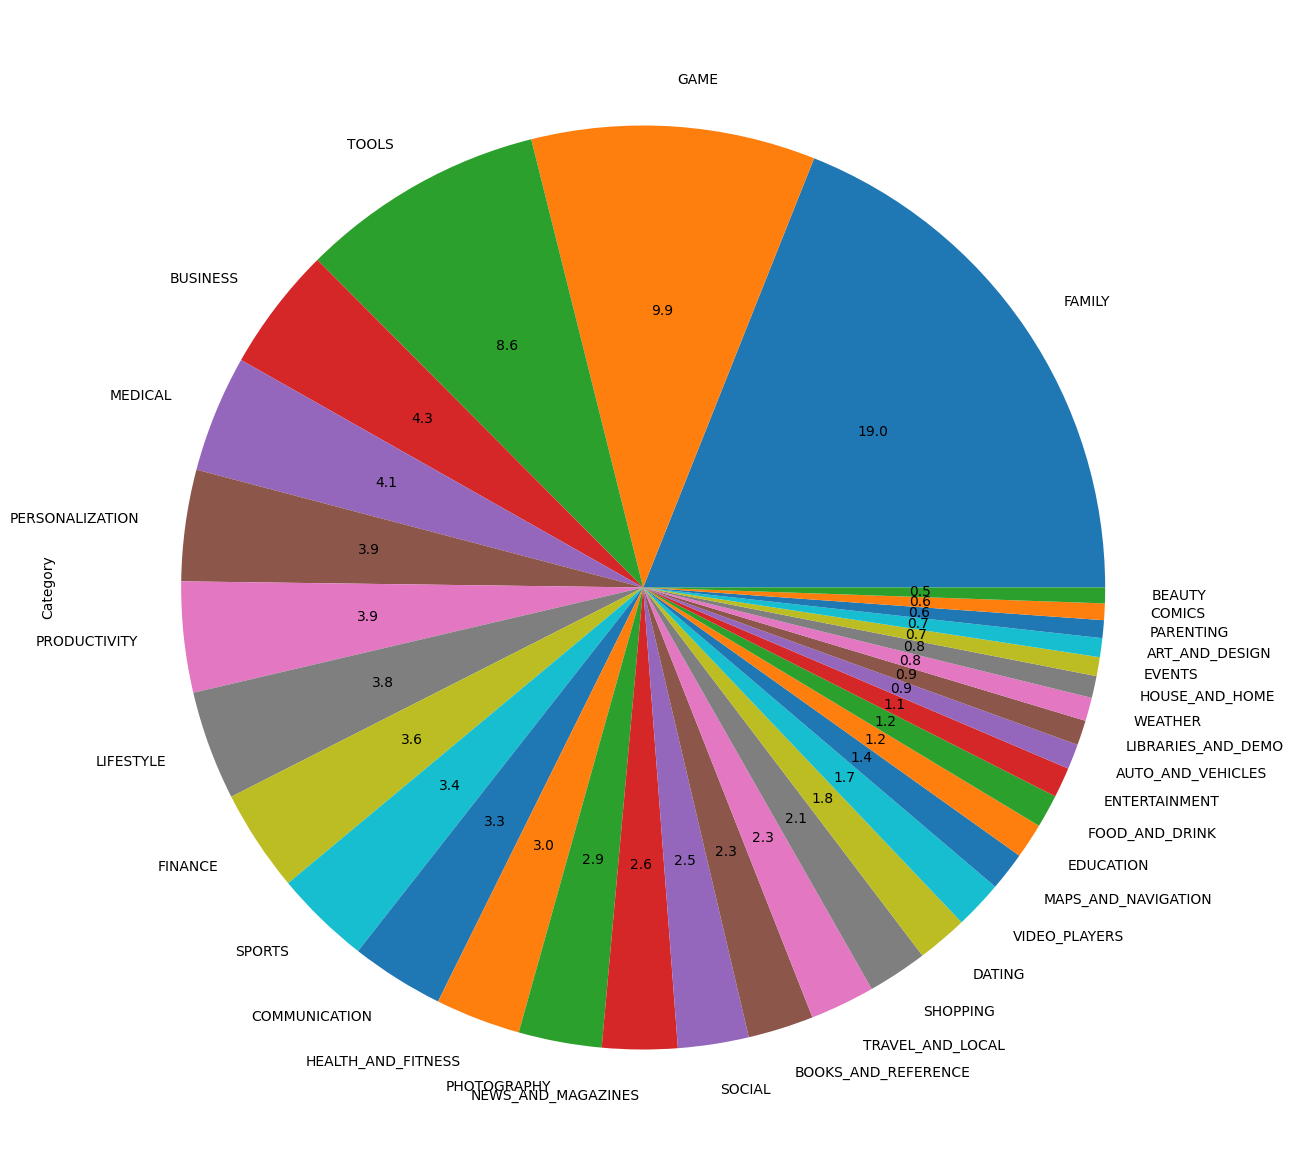

In [25]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,15),autopct='%1.1f')

##### Family is popular category

#### Whic is top 10 categories ?

In [30]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':'Count'},inplace=True)

In [31]:
category

,Count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


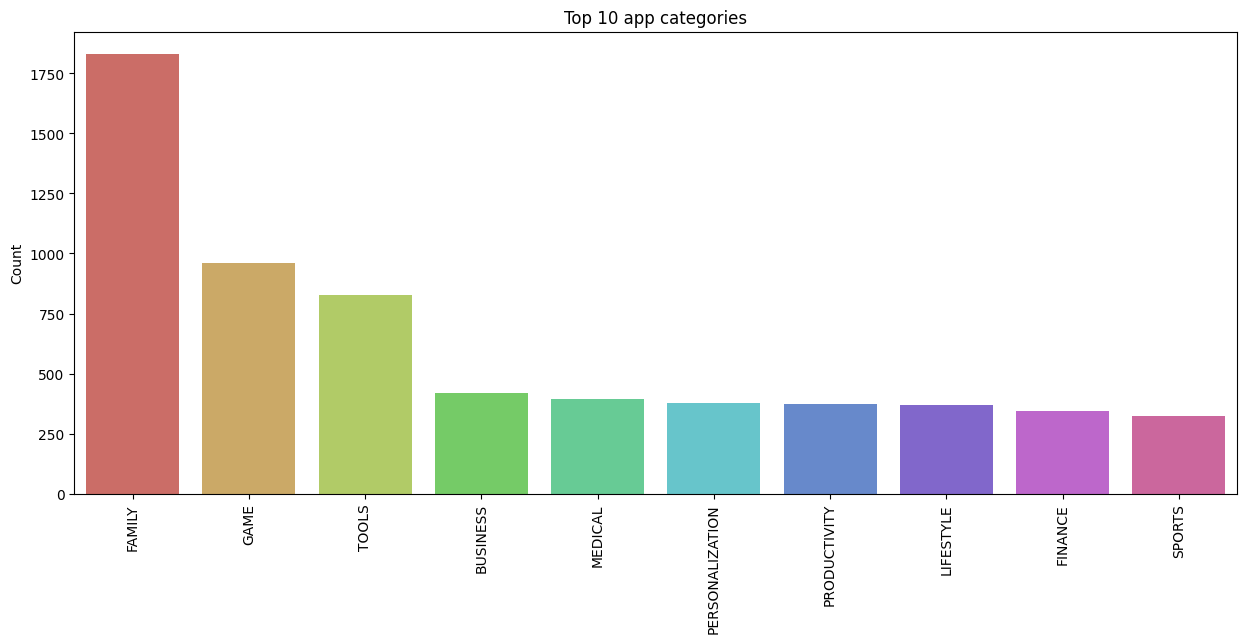

In [32]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='Count',data=category[:10],palette='hls')
plt.title('Top 10 app categories')
plt.xticks(rotation=90)
plt.show()

#### Which categories has largest number of installations ?

In [70]:
df_cat = df[df['Installs'] >= 1000000000]

KeyError: "None of [Int64Index([1000000000, 1000000000, 1000000000, 1000000000, 1000000000,\n            1000000000, 1000000000, 1000000000, 1000000000, 1000000000,\n            1000000000, 1000000000, 1000000000, 1000000000, 1000000000,\n            1000000000, 1000000000, 1000000000, 1000000000, 1000000000],\n           dtype='int64')] are in the [columns]"

#### What are the top 5 most installed apps in each popular catergories ?

#### How many apps are there on google play store which get 5 ratings ?